In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy
import matplotlib as mpl
mpl.rcParams['figure.dpi']=200
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [4]:
from sympy.codegen.cfunctions import Sqrt
x, y = sympy.symbols('x, y')
z1 = sympy.symbols('z_1')
z2 = sympy.symbols('z_2')
n = sympy.Function("n")
s = 1 + z2**2

n = 1

np.random.seed(123)
center1 = np.random.uniform(-4,4,(100,2))
np.random.seed(123)
center2 = np.random.uniform(0.05, 0.1,(100,1))
center = np.hstack((center1, center2))
#n = sympy.exp(-(x**2 + (z1-1)**2)/0.05) + 1
for x_, y_, z_ in center:
    n += sympy.exp(-((x-x_)**2 + (z1-y_)**2)/z_)

n = n/1.5
#n = 3*(1-x)**2*sympy.exp(-(x**2) - (z1+1)**2) - 10*(x/5 - x**3 - z1**5)*sympy.exp(-x**2-z1**2) - 1/3*sympy.exp(-(x+1)**2 - z1**2)
#n = n/15 + 1
n_ = sympy.lambdify((x, z1), n)

RHS = 1/n * n.diff(z1) * s +z2**2/s -1/n * (n.diff(x) + n.diff(z1) * z2) * z2
RHS = sympy.Lambda((x, z1, z2), RHS)
def f(z1z2, x):
    z1, z2 = z1z2
    return [z2, RHS(x, z1, z2)]

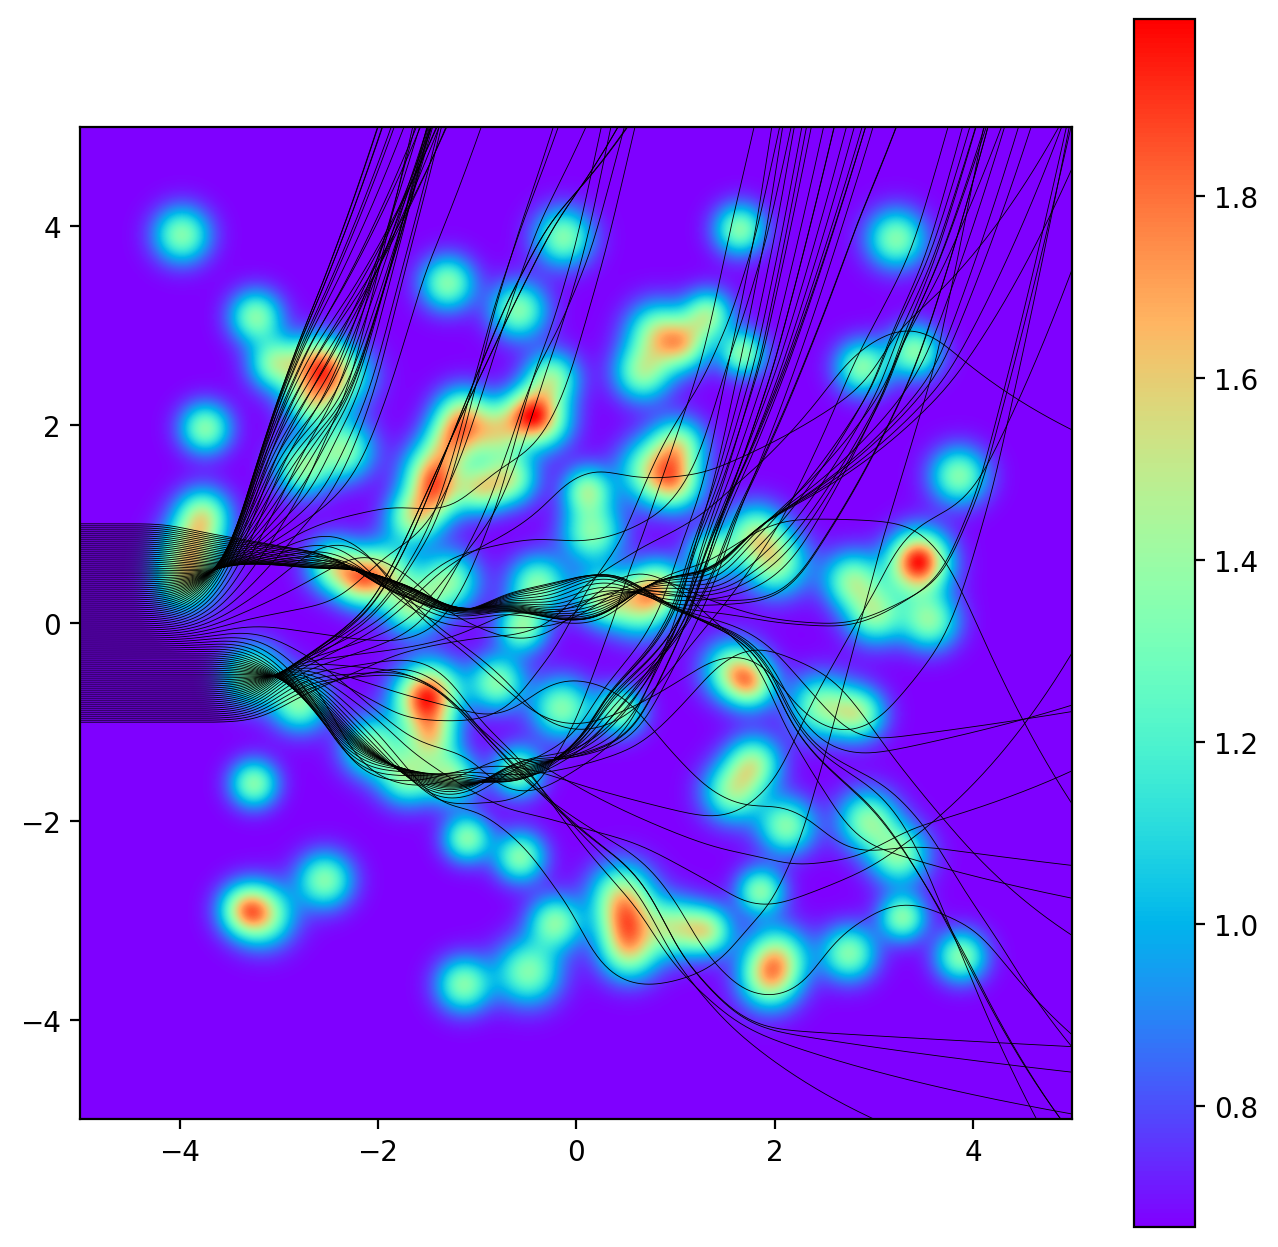

In [5]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
for z1 in np.linspace(-1, 1, 100):
    z1z2 = [z1, 0]
    x1 = np.linspace(-5, 5, 500)
    z1z2_x = integrate.odeint(f, z1z2, x1, hmax=0.1)
    ax.plot(x1, z1z2_x[:, 0], 'black', label='light ray', lw=0.3)
    

delta=0.01
x2 = y2 = np.arange(-5,5, delta)
X, Y = np.meshgrid(x2, y2)
Z = n_(X, Y)

im = ax.imshow(Z, interpolation='bilinear', cmap=cm.rainbow,
               origin='lower', extent=[-5, 5, -5, 5])
fig.colorbar(im, orientation='vertical', shrink=1)
fig.savefig('light_ray9.jpg',dpi=400)

In [6]:
fig.savefig('light_ray13.jpg',dpi=400)

In [1]:
import sympy 

In [2]:
sympy.fft([1,2,3])

[6, -2 + 2*I, 2, -2 - 2*I]

In [4]:
sympy.ifft?